In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df=pd.read_csv('database.csv')

In [3]:
df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [4]:
# Dropping all the insignificant columns from the dataset so that we can clean the dataset as per the analysis
data=df[['Operator Name','Pipeline Type','Liquid Type','Cause Category','Cause Subcategory','Unintentional Release (Barrels)','Liquid Recovery (Barrels)','Net Loss (Barrels)','Liquid Ignition','Liquid Explosion','Emergency Response Costs','All Costs','Pipeline Shutdown']]

In [5]:
data.isnull().sum()

Operator Name                        0
Pipeline Type                       18
Liquid Type                          0
Cause Category                       0
Cause Subcategory                    0
Unintentional Release (Barrels)      0
Liquid Recovery (Barrels)            0
Net Loss (Barrels)                   0
Liquid Ignition                      0
Liquid Explosion                     0
Emergency Response Costs             6
All Costs                            0
Pipeline Shutdown                  212
dtype: int64

In [6]:
# Dropping off all the blank rows to clean the dataset further as only appox. 9% of rows were missing, decided to drop the rows to improve the precion of dataset.  
data = data.dropna(subset=['Pipeline Shutdown','Pipeline Type','Emergency Response Costs'])
data

,Operator Name,Pipeline Type,Liquid Type,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Emergency Response Costs,All Costs,Pipeline Shutdown
0,ONEOK NGL PIPELINE LP,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.00,21.0,NO,NO,0.0,1627,NO
4,"PLAINS PIPELINE, L.P.",UNDERGROUND,CRUDE OIL,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,698.00,2.0,NO,NO,7500.0,29650,NO
5,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",UNDERGROUND,CRUDE OIL,MATERIAL/WELD/EQUIP FAILURE,MANUFACTURING-RELATED,3784.00,1547.00,2237.0,NO,NO,1800000.0,4194715,YES
6,"KINDER MORGAN LIQUID TERMINALS, LLC",TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",MATERIAL/WELD/EQUIP FAILURE,ENVIRONMENTAL CRACKING-RELATED,35.00,30.00,5.0,NO,NO,0.0,70400,NO
9,CONOCOPHILLIPS,TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",ALL OTHER CAUSES,MISCELLANEOUS,0.48,0.48,0.0,NO,NO,10000.0,30050,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,TC OIL PIPELINE OPERATIONS INC,ABOVEGROUND,CRUDE OIL,MATERIAL/WELD/EQUIP FAILURE,THREADED CONNECTION/COUPLING FAILURE,0.25,0.25,0.0,NO,NO,0.0,61015,YES
2791,EXXONMOBIL PIPELINE CO,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",ALL OTHER CAUSES,UNKNOWN,580.00,0.00,580.0,NO,NO,0.0,105400,YES
2792,ENBRIDGE STORAGE (CUSHING) L.L.C.,TANK,CRUDE OIL,MATERIAL/WELD/EQUIP FAILURE,OTHER EQUIPMENT FAILURE,1.00,1.00,0.0,NO,NO,5000.0,15050,NO
2793,MARATHON PIPE LINE LLC,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",ALL OTHER CAUSES,UNKNOWN,0.20,0.20,0.0,NO,NO,29565.0,41428,NO


In [7]:
# Replacing the 'Pipeline Shutdown' Column with 0 and 1 to run analysis and for easier graphs
data['Pipeline Shutdown'] = data['Pipeline Shutdown'].replace(['NO','YES'],[0,1])

In [8]:
# We used Ordinal Encoder that is a library within Sikit Learn. Ordinal encoder given unique value to each of the column 
#so that we can convert our string type data into Float type data so that we can analyze the heatmap
from sklearn.preprocessing import OrdinalEncoder
# Transforming each of the column with srt type of data into string
OE = OrdinalEncoder()
data["OP Name"] = OE.fit_transform(data[["Operator Name"]])
data["P Type"] = OE.fit_transform(data[["Pipeline Type"]])
data["Li Type"] = OE.fit_transform(data[["Liquid Type"]])
data["CC"] = OE.fit_transform(data[["Cause Category"]])
data["CSC"] = OE.fit_transform(data[["Cause Subcategory"]])
data["Li IG"] = OE.fit_transform(data[["Liquid Ignition"]])
data["Li EX"] = OE.fit_transform(data[["Liquid Explosion"]])

In [9]:
#Combining the necessary transformed column for modelling the dataset
final = data[['Pipeline Shutdown','OP Name','P Type', 'Li Type', 'CC', 'CSC', 'Li IG', 'Li EX', 'Emergency Response Costs', 'All Costs', 'Unintentional Release (Barrels)', 'Liquid Recovery (Barrels)', 'Net Loss (Barrels)']]
final

,Pipeline Shutdown,OP Name,P Type,Li Type,CC,CSC,Li IG,Li EX,Emergency Response Costs,All Costs,Unintentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels)
0,0,151.0,0.0,3.0,3.0,29.0,0.0,0.0,0.0,1627,21.00,0.00,21.0
4,0,163.0,3.0,2.0,2.0,34.0,0.0,0.0,7500.0,29650,700.00,698.00,2.0
5,1,60.0,3.0,2.0,4.0,19.0,0.0,0.0,1800000.0,4194715,3784.00,1547.00,2237.0
6,0,110.0,1.0,4.0,4.0,5.0,0.0,0.0,0.0,70400,35.00,30.00,5.0
9,0,40.0,1.0,4.0,0.0,21.0,0.0,0.0,10000.0,30050,0.48,0.48,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,1,185.0,0.0,2.0,4.0,35.0,0.0,0.0,0.0,61015,0.25,0.25,0.0
2791,1,79.0,3.0,3.0,0.0,36.0,0.0,0.0,0.0,105400,580.00,0.00,580.0
2792,0,66.0,1.0,2.0,4.0,24.0,0.0,0.0,5000.0,15050,1.00,1.00,0.0
2793,0,125.0,3.0,4.0,0.0,36.0,0.0,0.0,29565.0,41428,0.20,0.20,0.0


In [10]:
final.corr()

,Pipeline Shutdown,OP Name,P Type,Li Type,CC,CSC,Li IG,Li EX,Emergency Response Costs,All Costs,Unintentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels)
Pipeline Shutdown,1.000000,0.007203,0.144319,-0.023997,-0.034842,-0.058839,-0.002953,0.029862,0.052966,0.038914,0.090021,0.064643,0.074350
OP Name,0.007203,1.000000,-0.012317,-0.206078,-0.064052,-0.042749,-0.051113,-0.030763,-0.018165,-0.023184,-0.045486,-0.028207,-0.039588
P Type,0.144319,-0.012317,1.000000,-0.011757,-0.350163,-0.295838,-0.024820,0.025304,0.074218,0.056716,0.139171,0.094386,0.117461
Li Type,-0.023997,-0.206078,-0.011757,1.000000,0.142264,0.010313,0.022993,0.005922,-0.024280,-0.020038,-0.003807,-0.042306,0.014794
CC,-0.034842,-0.064052,-0.350163,0.142264,1.000000,0.234577,0.025430,0.028662,0.007055,0.013170,0.028222,0.010273,0.027838
CSC,-0.058839,-0.042749,-0.295838,0.010313,0.234577,1.000000,0.053572,-0.046131,-0.035463,-0.038140,-0.039944,0.001257,-0.046562
Li IG,-0.002953,-0.051113,-0.024820,0.022993,0.025430,0.053572,1.000000,0.393219,-0.008496,-0.003466,0.151691,-0.024654,0.185836
Li EX,0.029862,-0.030763,0.025304,0.005922,0.028662,-0.046131,0.393219,1.000000,-0.004166,0.001049,0.299389,-0.010756,0.349598
Emergency Response Costs,0.052966,-0.018165,0.074218,-0.024280,0.007055,-0.035463,-0.008496,-0.004166,1.000000,0.882881,0.293561,0.566579,0.081190
All Costs,0.038914,-0.023184,0.056716,-0.020038,0.013170,-0.038140,-0.003466,0.001049,0.882881,1.000000,0.319190,0.674915,0.061593


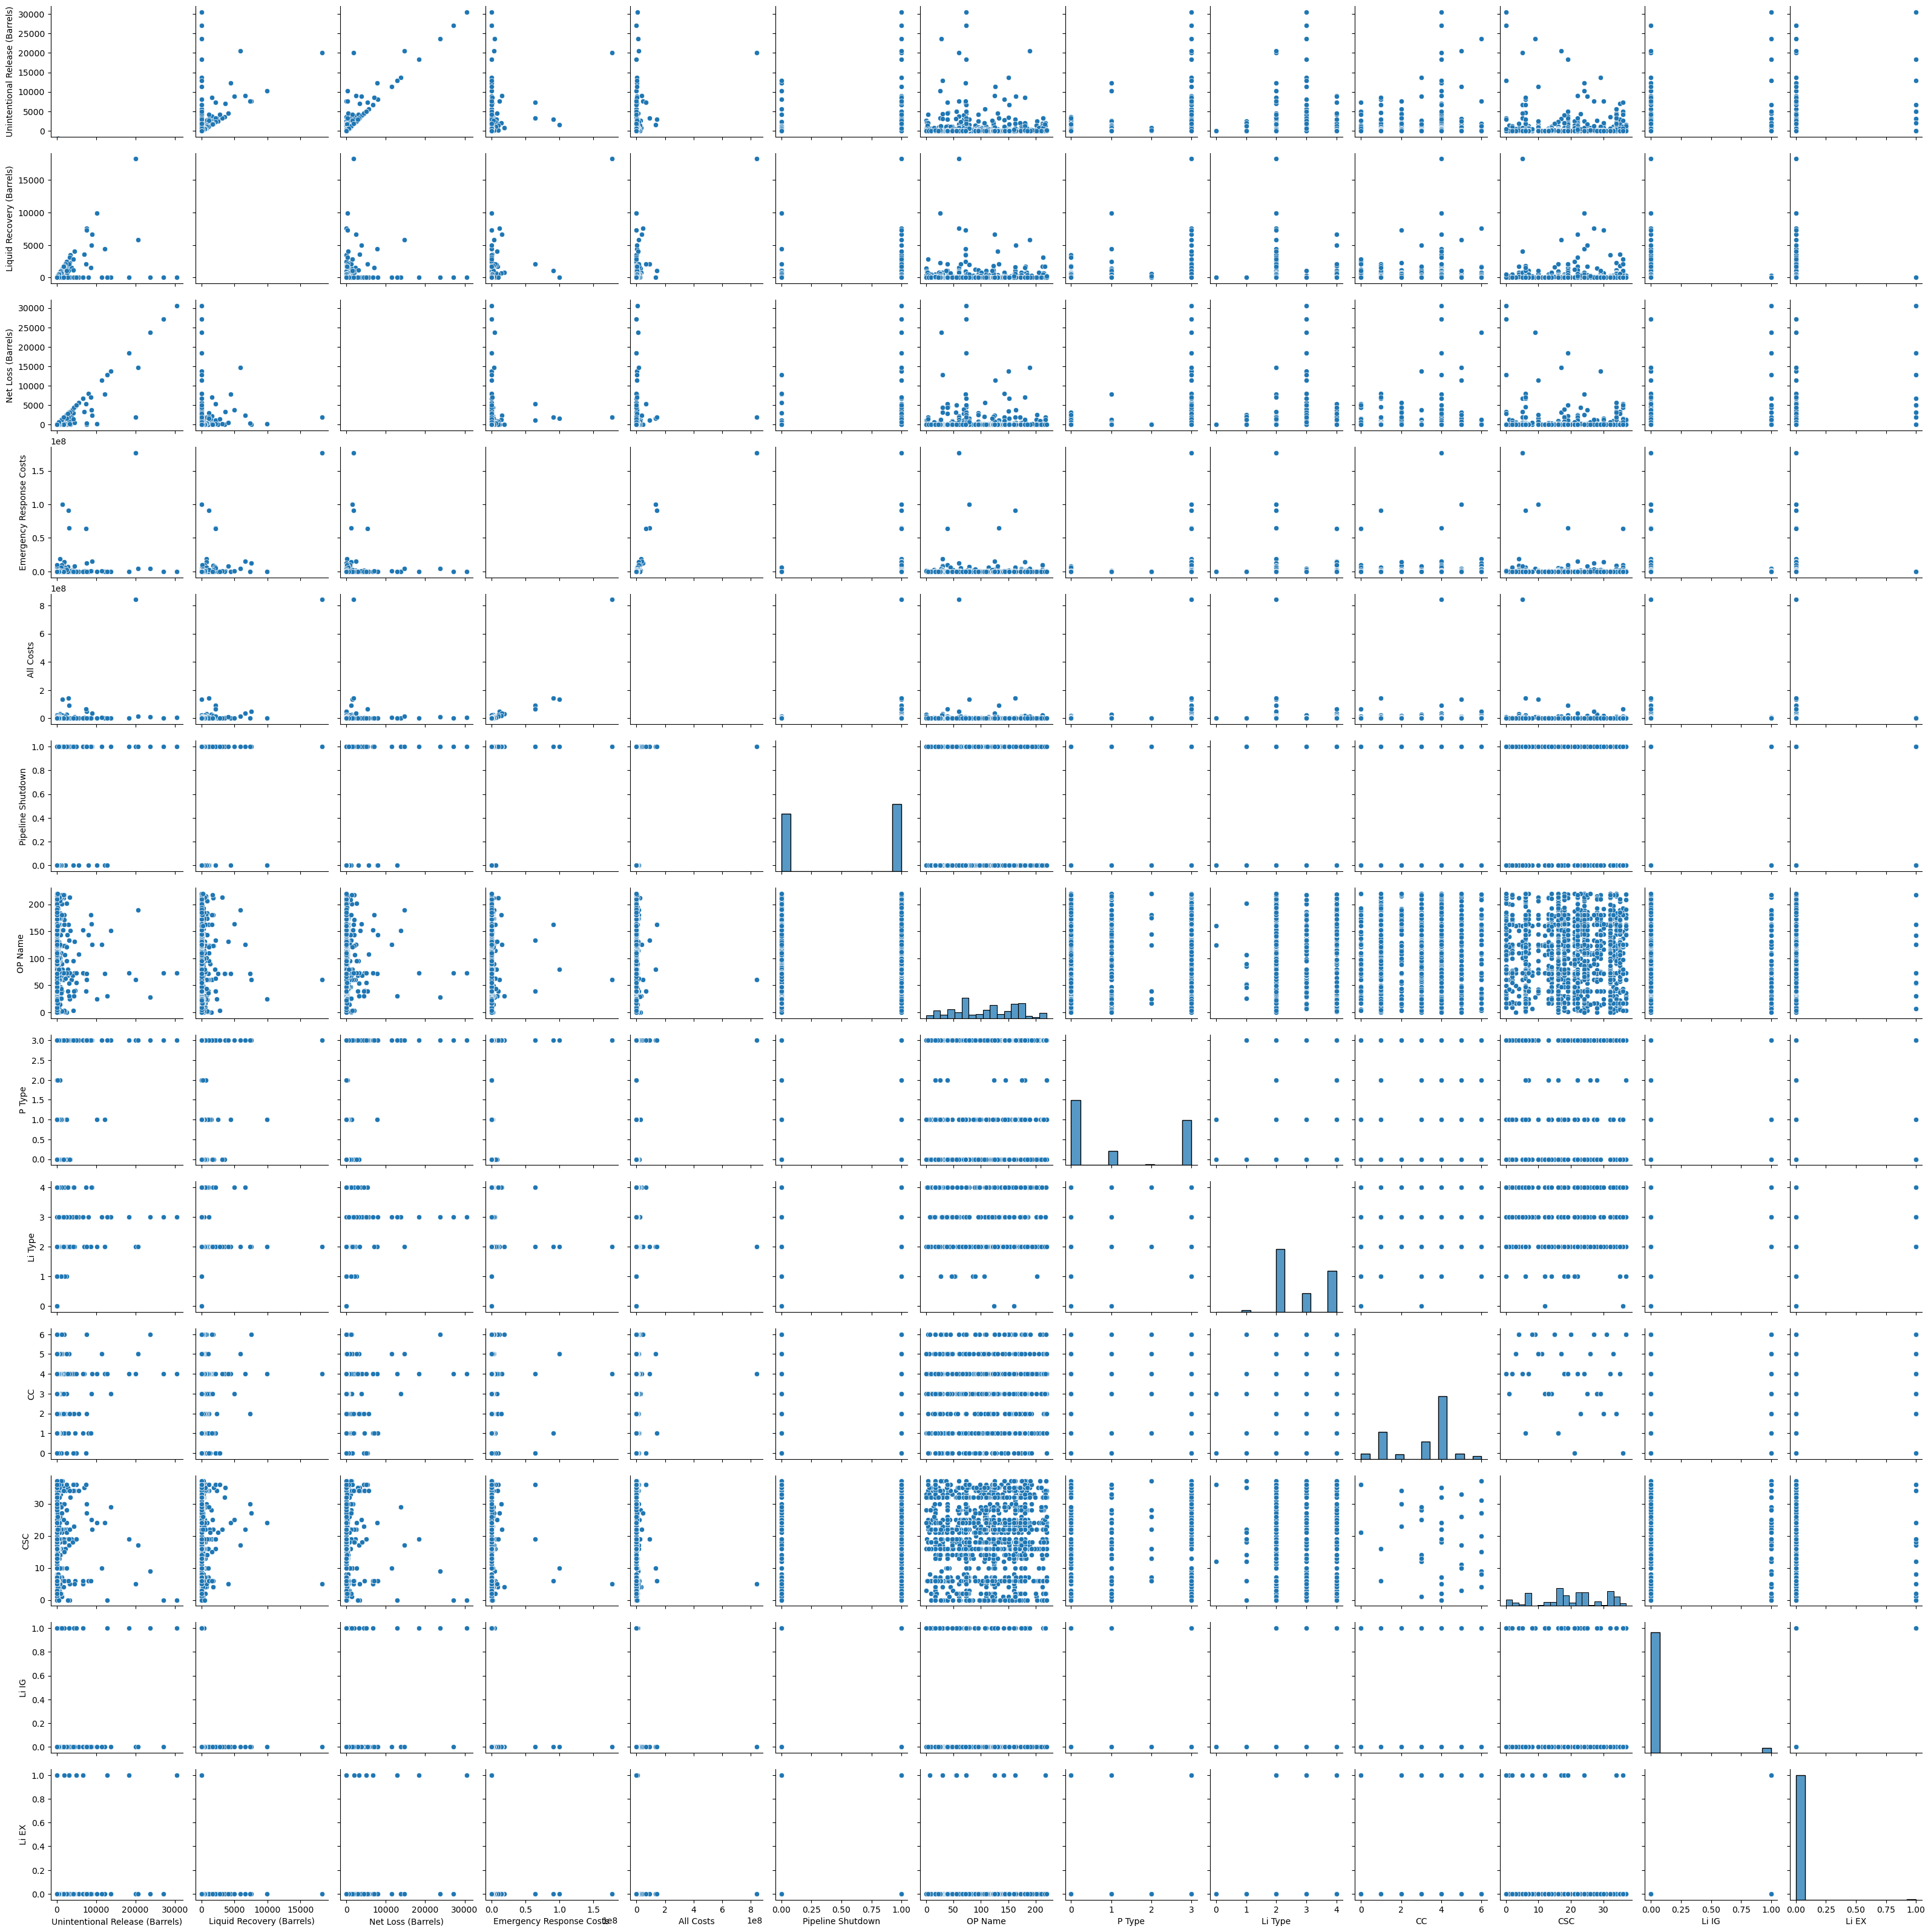

In [11]:
sb.pairplot(data)

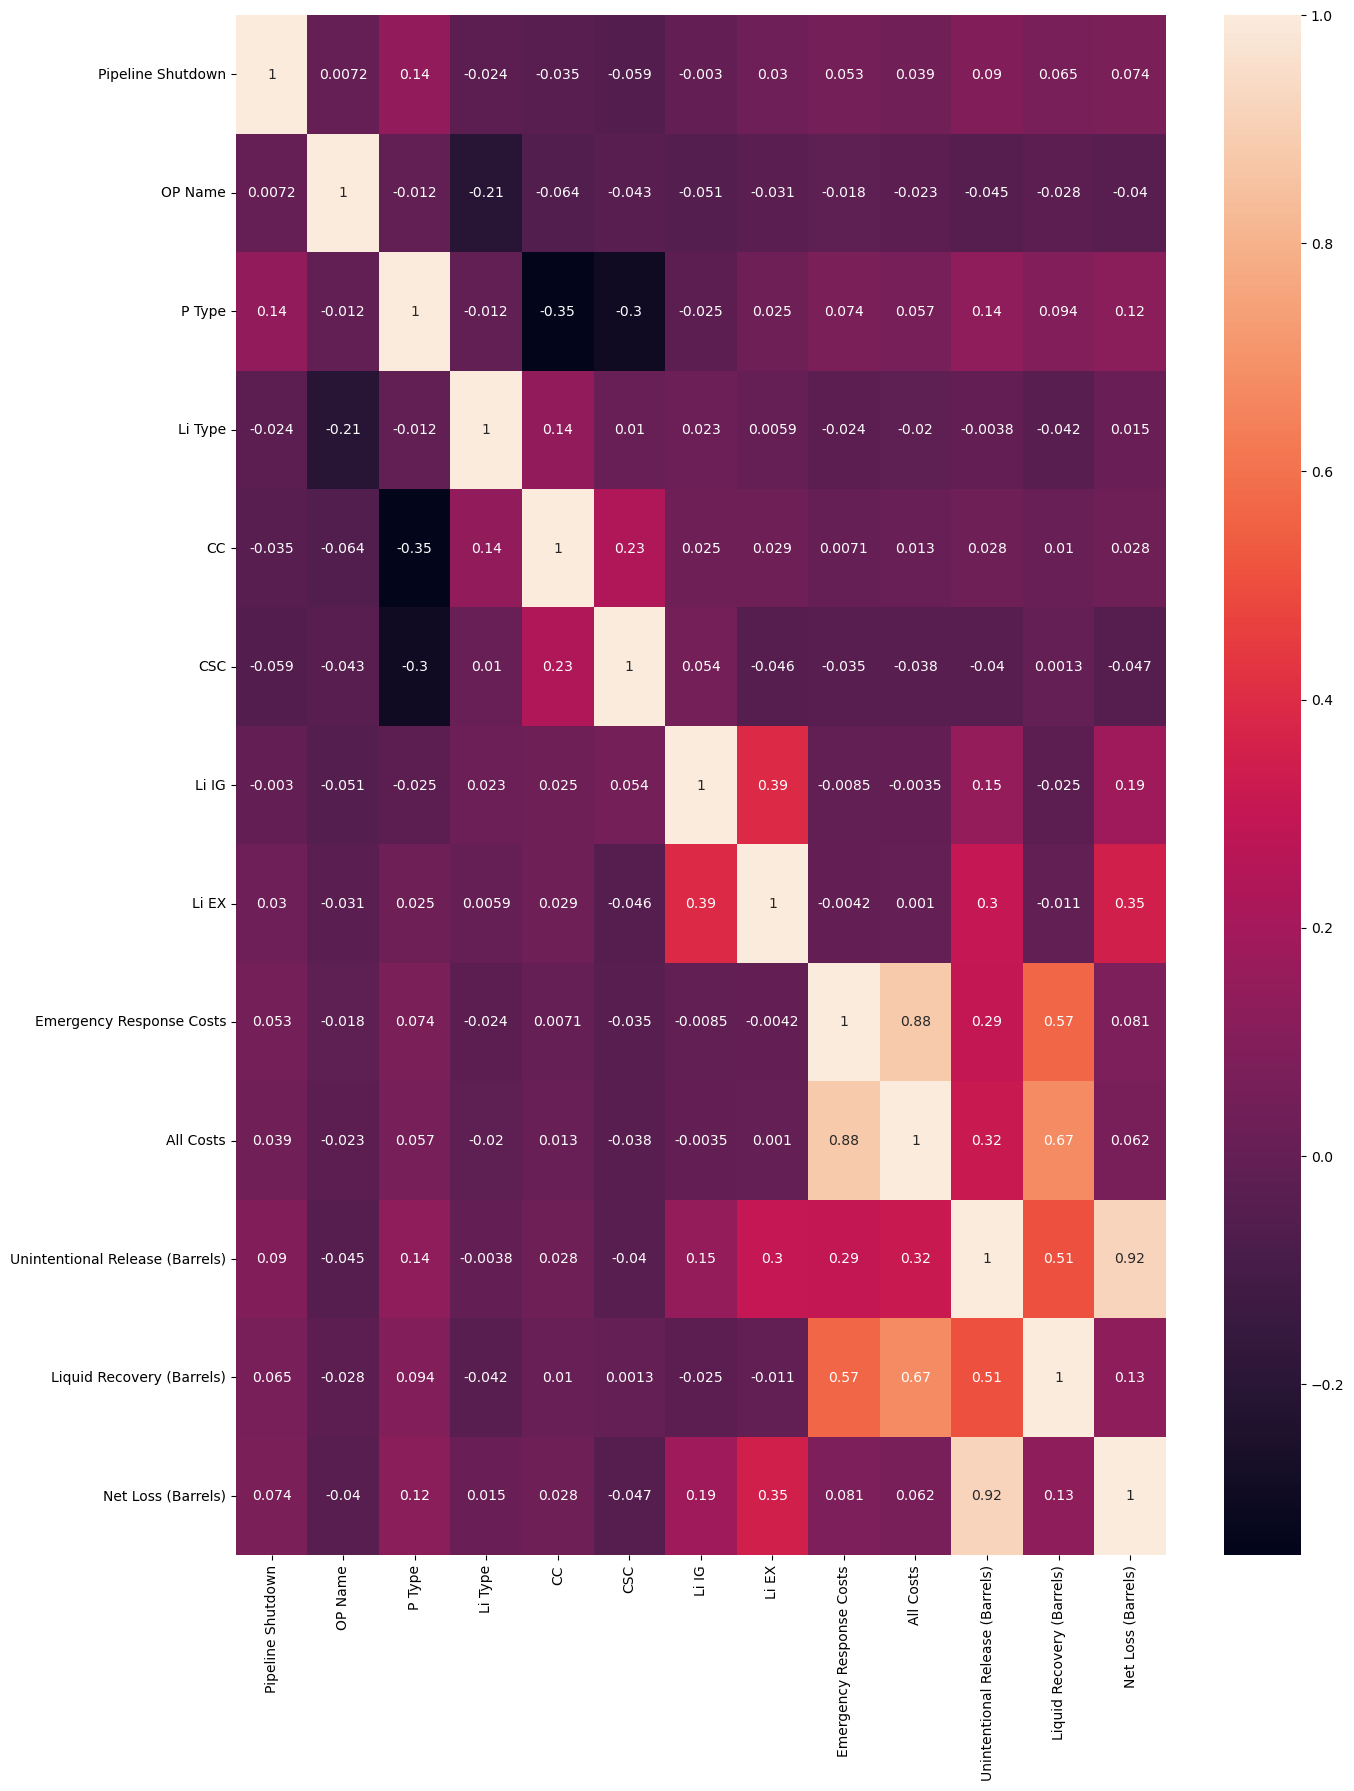

In [12]:
%matplotlib inline
corrmat=final.corr()
top_features=corrmat.index
plt.figure(figsize=(15,20))
#plotting heatmap
heat=sb.heatmap(final[top_features].corr(),annot=True)

In [13]:
x=final.iloc[:,1:]
y=final.iloc[:,0]
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [14]:
print(model.feature_importances_)

[0.13865661 0.06999704 0.03636679 0.04893104 0.09679676 0.0093992
 0.00141424 0.12869754 0.15517399 0.12383244 0.10213972 0.08859462]


NameError: name 'plot' is not defined

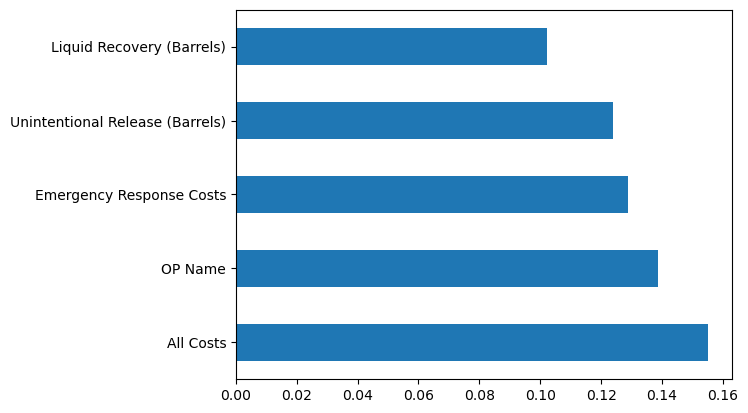

In [15]:
#graph of feature importance 
FI = pd.Series(model.feature_importances_, index=x.columns)
FI.nlargest(5).plot(kind='barh')
plot.show()

In [16]:
# Outcome is segmented in 'Y' and the attributes are in nonX 
nonX = final.values[:, 1:]
Y = final.values[:,0]
# Since the attributes have a wide range of values, for better understanding of the model - scaling the data down
from sklearn.preprocessing import scale
X = scale(nonX)
X

array([[ 0.71565401, -0.8696295 ,  0.22126642, ..., -0.14061464,
        -0.140326  , -0.09829897],
       [ 0.92695373,  1.28898542, -0.85972984, ...,  0.33626634,
         1.10492951, -0.11366381],
       [-0.88670224,  1.28898542, -0.85972984, ...,  2.50224713,
         2.61957411,  1.69372611],
       ...,
       [-0.78105237, -0.15009119, -0.85972984, ..., -0.15466121,
        -0.13854197, -0.11528116],
       [ 0.25783794,  1.28898542,  1.30226268, ..., -0.15522307,
        -0.13996919, -0.11528116],
       [-0.67540251, -0.8696295 , -0.85972984, ..., -0.15255422,
        -0.13318986, -0.11528116]])

In [17]:
# Splitting the dataset into testing and training purpose
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 3)

In [18]:
# Applying KNeighbors Classifier to our dataset
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')
model.fit(X_train, Y_train)
print(model)
predicted = model.predict(X_test)
print(metrics.classification_report(Y_test, predicted))
print(metrics.confusion_matrix(Y_test, predicted))

KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.58      0.52      0.55       362
         1.0       0.61      0.67      0.64       406

    accuracy                           0.60       768
   macro avg       0.60      0.60      0.60       768
weighted avg       0.60      0.60      0.60       768

[[190 172]
 [135 271]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
